# Initial analysis

A first look at the received data from CBS


### Initialization
Initialization of the libraries and csv or excel data files

In [2]:
import urllib.request as urllib, os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

filename = 'Coosto_berichten.csv'
datafolder = 'data/'

try:
    os.mkdir(datafolder)
except FileExistsError:
    pass

data = pd.read_csv('data/' + filename, delimiter=';')

### Cleaning
After the initialization a cleaning and possibly enriching process will be performed to make the data usable. 

In [3]:
def count_missing(x):
  return sum(x.isnull())
print("Missing values per column:")
print(data.apply(count_missing, axis=0))

Missing values per column:
zoekopdracht           0
datum                  0
url                    0
sentiment           6128
type                   0
discussielengte     6373
views                975
auteur                 0
volgers                0
invloed                0
GPS breedtegraad    4555
GPS lengtegraad     4555
bericht tekst          0
type bron              0
titel               9987
dtype: int64


### Pie chart

<<explanation>>

Neutral:  6128
Positive:  3675
Negative:  184


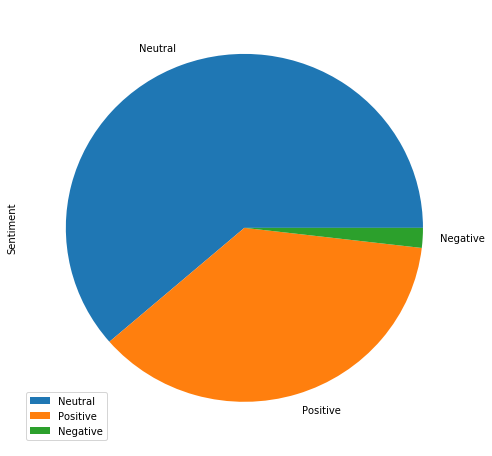

In [4]:
# Sentiment neutral
print('Neutral: ', len(data.loc[data['sentiment'].isnull()]))

# Sentiment positive
print('Positive: ', len(data.loc[data['sentiment'] == '+']))

# Sentiment negative
print('Negative: ', len(data.loc[data['sentiment'] == '-']))

# Pie chart
pd.DataFrame({'Sentiment': [len(data.loc[data['sentiment'].isnull()]), 
                          len(data.loc[data['sentiment'] == '+']),
                          len(data.loc[data['sentiment'] == '-'])]}, index=['Neutral', 'Positive', 'Negative']).plot.pie(y='Sentiment', figsize=(8,8))



### Comments vs post

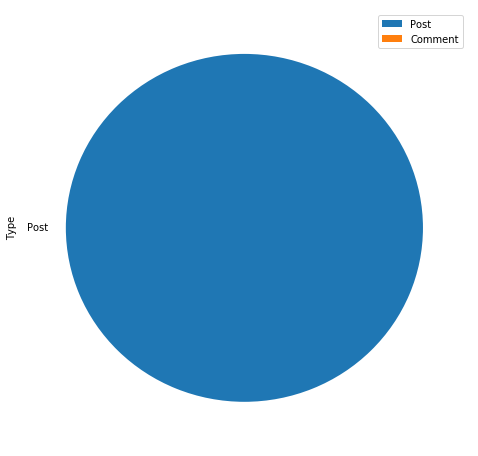

In [8]:
# Pie chart
pd.DataFrame({'Type': [len(data.loc[data['type'] == 'post']),
                          len(data.loc[data['type'] == 'comment'])]}, index=['Post', 'Comment']).plot.pie(y='Type', figsize=(8,8))


### Bar chart

<<explanation>>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014885F4AAC8>,
      dtype=object)

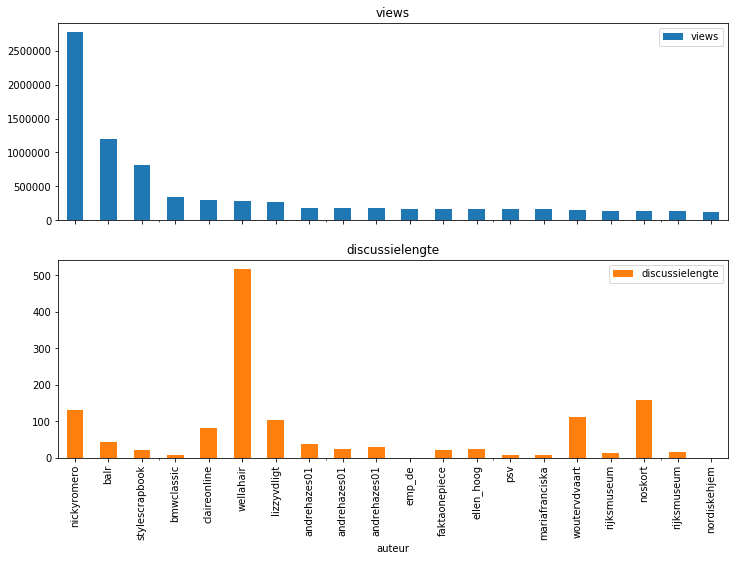

In [52]:
data.sort_values(by='views', ascending=False).head(10)

data.sort_values(by='views', ascending=False).head(20)\
    .plot.bar(x='auteur', y=['views', 'discussielengte'], rot=90, subplots=True, figsize=(12,8))

### Scatter chart

<>

Within The Netherlands: 5213 of 9987


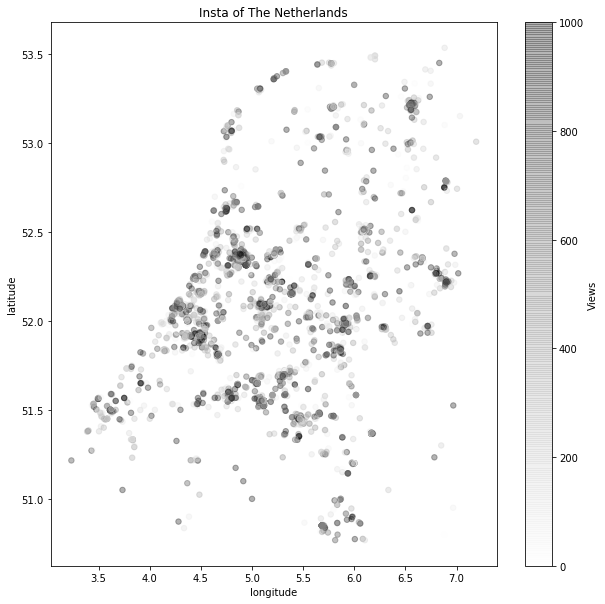

In [10]:
data_gps = data
data_gps = data_gps.loc[3.2 <= data_gps['GPS lengtegraad']]
data_gps = data_gps.loc[7.4 >= data_gps['GPS lengtegraad']]
data_gps = data_gps.loc[50.7 <= data_gps['GPS breedtegraad']]
data_gps = data_gps.loc[53.6 >= data_gps['GPS breedtegraad']]

plt.figure(figsize=[10,10]);

plt.title('Insta of The Netherlands')
plt.xlabel('longitude')
plt.ylabel('latitude')
#plt.xlim(3.2,7.4)
#plt.ylim(50.7,53.6)
sizes = 120

print('Within The Netherlands:', len(data_gps), 'of', len(data))

points=plt.scatter(data_gps['GPS lengtegraad'], data_gps['GPS breedtegraad'], marker='.'
                   , c=data_gps.views
                   , s=sizes**1
                   , alpha=0.3
                   , cmap='binary')

plt.clim(0,1000)

plt.colorbar(label='Views');

In [11]:
# Under construction because of the cleaning

# plt.figure(figsize=[10,10]);

# plt.title('Views vs discussion')
# plt.xlabel('views')
# plt.ylabel('discussionlength')
# #plt.xlim(3.2,7.4)
# #plt.ylim(50.7,53.6)
# sizes = 120

# points=plt.scatter(data['views'], data_gps['discussielengte'], marker='.'
#                    , s=sizes**1
#                    , alpha=0.3
#                    , cmap='binary')

# plt.clim(0,1000)

## Area chart

<<explanation>>

## Line chart

<<explanation>>

Text(0,0.5,'Number of posts')

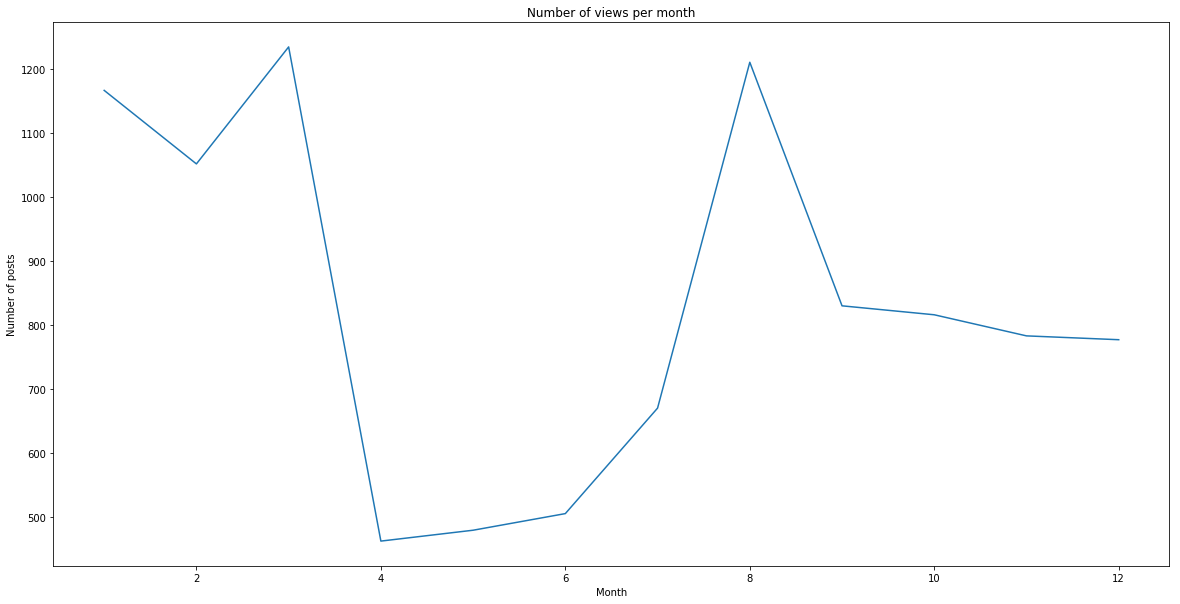

In [49]:
# Step 1: Convert to datetime
# data['datum'] = pd.to_datetime(data['datum'], errors='coerce')
# Step 2: Make extra column with month number
# data['Month'] = data['datum'].dt.month

data['Month'].value_counts().sort_index().plot(title='Number of views per month', \
                                               figsize=(20,10))
plt.xlabel('Month')
plt.ylabel('Number of posts')

## Scatter matrix

<<explanation>>

## Histogram

<<explanation>>

We're gonna start with seeing how many times someone posts more than once. So this means that for example there could be three people who have posted 8 times. This would be represented as 8 -- 3

In [45]:
data.head(10)
x = data['auteur'].value_counts()
x.value_counts().sort_index()

# Plotting is not useful yet, more data needed
# plt.hist(x)
# plt.show()

1    8521
2     460
3      96
4      27
5      19
6       4
7       2
8       1
9       1
Name: auteur, dtype: int64

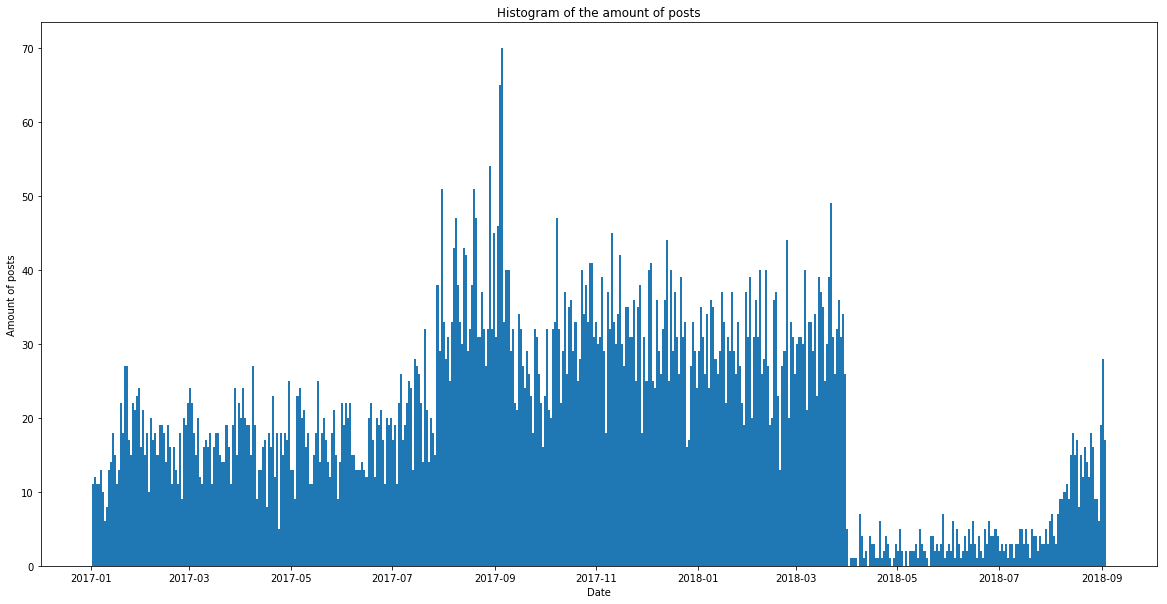

In [50]:
data['datum'] = data['datum'].astype("datetime64")

fig = plt.figure(figsize=(20,10))

bins = 500
plt.hist(data['datum'], bins=bins)

plt.xlabel('Date')
plt.ylabel('Amount of posts')
plt.title('Histogram of the amount of posts')
plt.show()